# **Analyzing Factors Affecting the Price of Cars in Canada**

## **Group 11**

### Team Members:


1.   Tilak Pandya
2.   Kushal Ghimire
3.   Satya Gaurav palakollu




##**Project Summary​**
This project aims to conduct a comprehensive analysis to identify and understand the key factors that affect used car prices in Canada. By exploring historical second hand car price data and relevant variables, we can gain insights into the market dynamics and make informed predictions about future trends.​

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

##**Load the dataset**

In [3]:
# Read the CSV file into a DataFrame
df = pd.read_csv('ca-dealers-used.csv', low_memory=False)

##**Data Preprocessing**

### 1. Handling Missing Values

In [4]:
# Check for missing values
df.isnull().sum()

id                  0
vin                 0
price           35117
miles           27013
stock_no        27674
year               17
make                0
model            4794
trim            38779
body_type       34025
vehicle_type    38238
drivetrain      38995
transmission    35681
fuel_type       70813
engine_size     72653
engine_block    73164
seller_name      2232
street           7929
city             7774
state            7836
zip              7769
dtype: int64

To handle missing values, you can use various strategies depending on the nature of the data and the specific requirements of your analysis.

**1. Numeric Columns (e.g., price, miles, year):**

For columns with relatively few missing values, you can often fill them with the mean, median, or mode of the column. This helps to preserve the overall distribution of the data.

In [5]:
df['price'].fillna(df['price'].median(), inplace=True)
df['miles'].fillna(df['miles'].median(), inplace=True)
df['year'].fillna(df['year'].mode()[0], inplace=True)

**2. Categorical Columns (e.g., make, model, body_type):**

For categorical columns, you can fill missing values with the most frequent category (mode) or use a special category like "Unknown" to represent missing values.

In [6]:
df['model'].fillna(df['model'].mode()[0], inplace=True)
df['body_type'].fillna("Unknown", inplace=True)

**3. Text Columns (e.g., vin, seller_name, street etc):**

Text columns are less likely to be imputed with meaningful values. In such cases, you can fill them with a placeholder like "N/A" to indicate missing values.

In [7]:
columns_to_fill = ['vin', 'seller_name', 'street', 'state', 'city', 'zip', 'drivetrain', 'trim', 'fuel_type', 'transmission', 'stock_no', 'vehicle_type','engine_size', 'engine_block']

for col in columns_to_fill:
    df[col].fillna("N/A", inplace=True)

**4. Columns with a High Percentage of Missing Values (e.g., engine_size, engine_block):**

If a column has a very high percentage of missing values, it might be best to drop that column if it doesn't provide significant value to your analysis

Again check if there is still any missing value or not.

In [8]:
df.isnull().sum()

id              0
vin             0
price           0
miles           0
stock_no        0
year            0
make            0
model           0
trim            0
body_type       0
vehicle_type    0
drivetrain      0
transmission    0
fuel_type       0
engine_size     0
engine_block    0
seller_name     0
street          0
city            0
state           0
zip             0
dtype: int64

###2. Outliers Handling


Handling outliers in numeric columns is an important step in data preprocessing. Outliers can significantly impact the performance of machine learning models.

In [9]:
# Define a threshold for the Z-score
threshold = 3

In [10]:
#Store numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns

['price', 'miles', 'year']

In [11]:
# Loop through each numeric column and handle outliers
for column in numeric_columns:
    z_scores = np.abs(stats.zscore(df[column]))
    df = df[(z_scores < threshold)] # Remove data points with z-score < 3 (adjust the threshold as needed)

We first define a threshold for the Z-score (commonly set to 3).

We select all numeric columns using df.select_dtypes(include=[np.number]).columns.tolist().

Then, we loop through each numeric column, calculate the Z-scores for the data points in that column, and keep only the data points where the absolute Z-score is less than the defined threshold. This effectively removes outliers from each numeric column.

###3. Encoding Categorical Variables

 Convert all categorical variables into numerical using one-hot encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [13]:
categorical_cols = ['make','model','body_type','vehicle_type','drivetrain','transmission','trim','fuel_type','engine_size', 'engine_block', 'state', 'city']

In [14]:
encoding_dict = {}
# Iterate through each categorical column
for column in categorical_cols:
    unique_values = df[column].unique()

    # Create a mapping of unique values to index numbers
    value_to_index = {value: index for index, value in enumerate(unique_values, start=1)}

    # Add the mapping to the encoding dictionary
    encoding_dict[column] = value_to_index

# Display the encoding dictionary
print(encoding_dict)

{'make': {'Acura': 1, 'Dodge': 2, 'Chrysler': 3, 'RAM': 4, 'Ford': 5, 'Chevrolet': 6, 'Buick': 7, 'Cadillac': 8, 'GMC': 9, 'Lexus': 10, 'Volkswagen': 11, 'BMW': 12, 'Mercedes-Benz': 13, 'Hummer': 14, 'Lincoln': 15, 'Volvo': 16, 'INFINITI': 17, 'Toyota': 18, 'Land Rover': 19, 'Bentley': 20, 'Audi': 21, 'MINI': 22, 'Porsche': 23, 'Honda': 24, 'Jeep': 25, 'Pontiac': 26, 'Saturn': 27, 'Nissan': 28, 'Eagle': 29, 'Mazda': 30, 'Mercury': 31, 'Hyundai': 32, 'Suzuki': 33, 'FIAT': 34, 'Kia': 35, 'Scion': 36, 'Mitsubishi': 37, 'Subaru': 38, 'Isuzu': 39, 'Am General': 40, 'smart': 41, 'Tesla': 42, 'GENESIS': 43, 'Jaguar': 44, 'McLaren': 45, 'Rolls-Royce': 46, 'Lotus': 47, 'Saab': 48, 'Maserati': 49, 'Alfa Romeo': 50, 'Ferrari': 51, 'Lamborghini': 52, 'Aston Martin': 53, 'KARMA': 54}, 'model': {'NSX': 1, 'Avenger': 2, '200': 3, 'Ram 1500 Pickup': 4, 'F-150': 5, 'Camaro': 6, 'Volt': 7, 'LaCrosse': 8, 'ELR': 9, 'Express Passenger': 10, 'Silverado 2500HD': 11, 'Silverado 3500HD': 12, 'Express Cargo': 

In [15]:
# Map the encoding_dict to the DataFrame
data_encoded = df.copy()  # Create a copy of the DataFrame to keep the original data

# Iterate through each categorical column and replace values with index numbers
for column, value_to_index in encoding_dict.items():
    data_encoded[column] = data_encoded[column].map(value_to_index)

In [16]:
data_encoded.head()

,id,vin,price,miles,stock_no,year,make,model,trim,body_type,...,drivetrain,transmission,fuel_type,engine_size,engine_block,seller_name,street,city,state,zip
15,79d4a6a9-c265,19UNC1B0XHY800061,21900.0,12864.0,MU2483,2017.0,1,1,1,1,...,1,1,1,1,1,pfaff leasing calgary,5539 6th Street Se,1,1,T2H 1L6
16,a7b53aaa-ae99,1B3LC56R18N652133,3499.0,174850.0,N/A,2008.0,2,2,2,2,...,2,1,2,2,1,carview motor,1113 Finch Ave W,2,2,M3J 2E5
17,acdf10ba-fa76,1B3LC56R18N660054,5200.0,89124.0,215140,2008.0,2,2,2,2,...,2,1,2,2,1,strickland's brantford chevrolet buick gmc cad...,19-21 Lynden Road,3,2,N3R 8B8
18,3ec82d01-aec0,1B3LC56R38N195597,4789.0,151745.0,30479,2008.0,2,2,2,2,...,2,1,2,2,1,dale wurfel chrysler dodge jeep ltd.,28478 Centre Road,4,2,N7G 3J2
20,d128f381-0f23,1B3LC56R88N566740,5995.0,176631.0,2008DAVGWHT,2008.0,2,2,2,2,...,2,1,2,2,1,first edmonton auto,8303 118 Avenue Northwest,5,1,T5B 0S4


This code will create binary (0 or 1) columns for each category in the specified categorical columns, effectively converting them into a numerical format suitable for machine learning algorithms.

##4. Handling Duplicate values

In [17]:
# Check for and remove duplicate rows
duplicate_rows = data_encoded[data_encoded.duplicated()]
# Display duplicate rows
duplicate_rows

,id,vin,price,miles,stock_no,year,make,model,trim,body_type,...,drivetrain,transmission,fuel_type,engine_size,engine_block,seller_name,street,city,state,zip


- This code will identify and display the duplicate rows in your dataset. You can then decide how to handle these duplicates based on your project's requirements.

- As we can see, there are no exact duplicate rows in your dataset. This is a good sign, as it suggests your dataset may already be clean in terms of duplicate records.

###5. Data Type Conversion

 The pd.to_datetime() function has effectively transformed the data in the 'year' column into datetime objects.

In [18]:
#Convert 'Year' column to datetime format
data_encoded['year'] = pd.to_datetime(data_encoded['year'], format='%Y')

 The pd.to_datetime() function has effectively transformed the data in the 'year' column into datetime objects.

###6. Categories Luxuries Brands

In [19]:
# ADD Luxury Field
luxury_brands = [
    'Acura', 'Audi', 'Volvo', 'BMW', 'Buick', 'Cadillac', 'Chrysler',
    'Maserati', 'Porsche', 'Mercedes-Benz', 'Tesla', 'Infiniti',
    'Lamborghini', 'Alfa Romeo', 'Bentley', 'Aston Martin', 'Polestar',
    'Scion', 'Genesis', 'Jaguar', 'Rolls-Royce', 'McLaren', 'Ferrari'
]

df['luxury'] = df['make'].isin(luxury_brands)

# ADD Age Field
df['car_age'] = 2023 - df['year']

### 7. Modify Fuel Type for generalizing

In [20]:
fuel_type_mapping = {
    'Electric / Premium Unleaded': 'Electric',
    'E85': 'Hybrid',
    'E85 / Unleaded; Unleaded': 'Hybrid',
    'Unleaded / E85': 'Hybrid',
    'Unleaded / Unleaded': 'Gas',
    'E85 / Unleaded; Unleaded / Unleaded': 'Hybrid',
    'Premium Unleaded; Unleaded': 'Gas',
    'Premium Unleaded / Unleaded': 'Gas',
    'Compressed Natural Gas / Lpg': 'Natural Gas',
    'Compressed Natural Gas / Unleaded': 'Natural Gas',
    'Biodiesel': 'Diesel',
    'E85 / Premium Unleaded': 'Hybrid',
    'Electric / E85': 'Electric',
    'Compressed Natural Gas': 'Natural Gas',
    'Compressed Natural Gas; Unleaded': 'Natural Gas',
    'Unleaded / Premium Unleaded': 'Gas',
    'Unleaded / Electric': 'Electric',
    'Electric / Hydrogen': 'Hydrogen',
    'Premium Unleaded / Natural Gas': 'Natural Gas',
    'Diesel / Premium Unleaded': 'Diesel',
    'nan': None,
    'Diesel': 'Diesel',
    'Electric': 'Electric',
    'Unleaded': 'Gas',
    'E85 / Unleaded': 'Hybrid',
    'Premium Unleaded': 'Gas',
    'Electric / Unleaded': 'Electric'
}

df['fuel_type'] = df['fuel_type'].map(fuel_type_mapping)

##**Exploratory Data Analysis (EDA)**

###1. Histogram for Price Distribution
This visualization helps you understand the distribution of car prices in your dataset.

In [21]:
import plotly.express as px

# Assuming df is your DataFrame and 'price' is the column representing car prices
fig = px.histogram(df, x='price', nbins=40, title='Car Price Distribution',
                   labels={'price': 'Price', 'count': 'Frequency'},
                   template='plotly', width=800, height=400)

# Show the plot
fig.show()

The histogram for price distribution reveals that the majority of cars in the dataset are clustered within the price range of approximately 8000 to $20,000, with the highest frequency of around 70,000 cars. Beyond this price point, the frequency of cars sharply decreases, indicating that there are fewer cars with higher prices in the dataset. This distribution suggests that a significant proportion of the cars in the dataset are relatively low-priced, while higher-priced cars are less common.

### 2. Bar Chart for Average Car Prices of the model of the Car by Year

In [22]:
import plotly.express as px
import pandas as pd

# Filter the DataFrame for Ford cars and non-zero years
ford_df = df[(df['make'] == 'Ford') & (df['year'] > 0)]

# Group by year and calculate the average price for Ford cars
avg_price_by_year = ford_df.groupby('year')['price'].mean().reset_index()

# Plotting the interactive bar chart
fig = px.bar(avg_price_by_year, x='year', y='price', title='Average Car Prices for Ford Model by Year',
             labels={'year': 'Year', 'price': 'Average Price'},
             template='plotly', width=800, height=600)

# Show the plot
fig.show()

Certainly, here's a summary specific to the bar chart depicting the average car prices for Ford model by year:

The provided bar chart is designed to present the average prices of Ford car models over a significant time span from 1990 to 2020. The x-axis of the chart denotes the years, while the y-axis quantifies the average prices in U.S. dollars. The data reveals a consistent upward trend in Ford car prices over these three decades, with prices ranging from roughly $10,000 to $40,000.

This chart is an effective visual tool for tracking the historical evolution of Ford car prices. It offers valuable insights into pricing trends for Ford vehicles, highlighting how these prices have steadily increased over time. The information it conveys is easily accessible to a wide audience, making it a useful resource for both consumers and analysts interested in the automotive industry's pricing dynamics. The chart's clarity and simplicity make it a powerful means of communication for understanding the price history of Ford car models.

In summary, the bar chart effectively visualizes the changing landscape of average car prices within the specified timeframe, highlighting a clear and consistent upward trend, making it a valuable tool for understanding price fluctuations in the automobile industry.

### 3.Violin Plot for Price Distribution by Fuel Type
This violin plot illustrates the distribution of car prices for different fuel types.

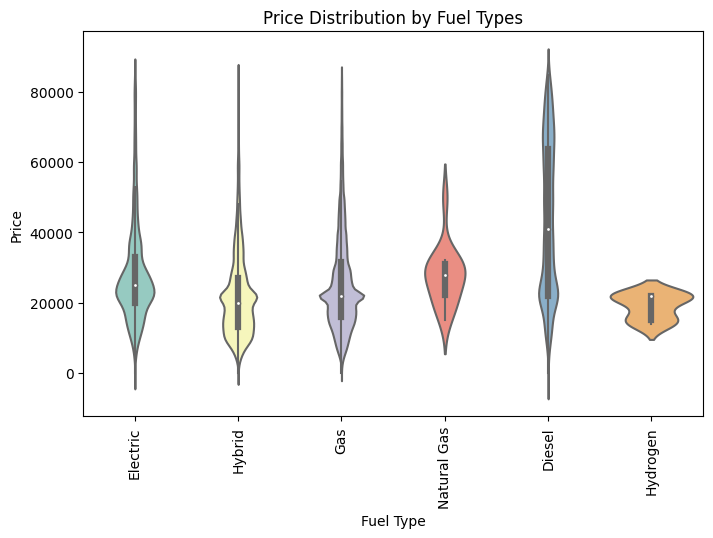

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

top_fuel_types = df['fuel_type'].value_counts().head(10).index
filtered_df = df[df['fuel_type'].isin(top_fuel_types)]

plt.figure(figsize=(8, 5))
sns.violinplot(x='fuel_type', y='price', data=filtered_df, palette='Set3', split=False)
plt.title('Price Distribution by Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

**Interpretation:**

- The mean price for Diesel vehicles is the highest among the fuel types, followed by Electric, Gas, and N/A.
- Diesel vehicles have the highest variability in prices, as indicated by the highest standard deviation.
- The minimum and maximum prices vary across fuel types, with some overlap.
- The median (50th percentile) provides the middle value of the dataset, and it seems Diesel and Electric vehicles have higher median prices compared to Gas and N/A.
- The 25th and 75th percentiles give a sense of the spread of prices, with Diesel vehicles generally having higher prices at these points.
- This information provides a comprehensive overview of the price distribution for different fuel types, offering insights into central tendency, variability, and the overall spread of prices within each category.

### 4.Time Series Plot for Car Prices according to the cities Over the Years:

<ipython-input-24-b0d3f7bf3d2b>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-24-b0d3f7bf3d2b>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 1200x600 with 0 Axes>

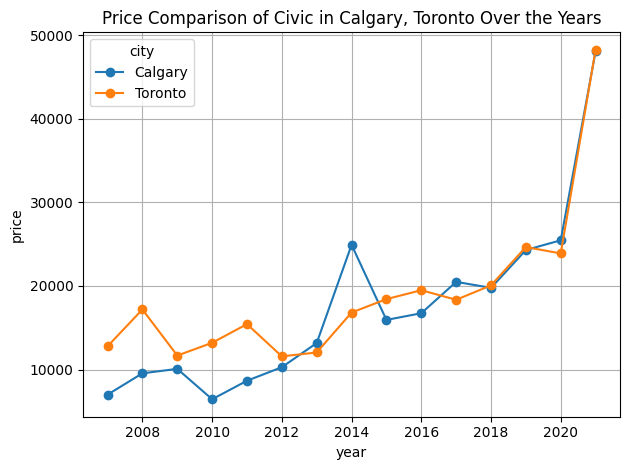

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter the DataFrame for the specific car model (e.g., Elantra) and cities (e.g., Calgary and Toronto)
selected_cities = ['Calgary', 'Toronto']
selected_model = 'Civic'

filtered_df = df[(df['city'].isin(selected_cities)) & (df['model'] == selected_model)]

# Clean the 'price' column by removing non-numeric values and converting to a numeric data type
filtered_df['price'] = pd.to_numeric(filtered_df['price'], errors='coerce')

# Drop rows with missing or non-numeric values in the 'price' column
filtered_df.dropna(subset=['price'], inplace=True)

# Aggregate data for the same year and city combination (e.g., by taking the mean)
pivot_df = filtered_df.groupby(['year', 'city'])['price'].mean().unstack()

# Create a line plot to compare prices over the years
plt.figure(figsize=(12, 6))
pivot_df.plot(kind='line', marker='o')
plt.title(f'Price Comparison of {selected_model} in {", ".join(selected_cities)} Over the Years')
plt.xlabel('year')
plt.ylabel('price')
plt.grid(True)
plt.legend(title='city')
plt.tight_layout()
plt.show()

1. **Price Disparity Over Years:**
   - **Insight:** The average price of Honda Civic in Calgary has generally been lower than in Toronto, except for a notable spike in 2021.
   - **Action:** Dealerships in both cities should investigate the reasons behind the 2021 spike, ensuring it's not a result of localized factors impacting pricing.

2. **City-Specific Trends:**
   - **Insight:** While Toronto's prices have shown a gradual increase over the years, Calgary experienced more fluctuations.
   - **Action:** Dealerships can tailor marketing and pricing strategies based on the unique trends in each city, recognizing varying consumer behaviors and economic conditions.

3. **Year 2014 Anomaly:**
   - **Insight:** The sharp increase in 2014 in Calgary might indicate an outlier or a significant event affecting prices.
   - **Action:** Dealerships should investigate the cause of this anomaly—whether it was due to limited supply, increased demand, or other factors—to better understand market dynamics.

4. **Market Response to New Models:**
   - **Insight:** The introduction of newer Honda Civic models in 2016 did not lead to a substantial increase in average prices in either city.
   - **Action:** Manufacturers and dealers can analyze consumer responses to model updates, informing decisions on future launches and pricing strategies.

5. **Potential Economic Impact in 2021:**
   - **Insight:** The substantial price increase in 2021, especially in Toronto, could be influenced by economic factors or increased demand.
   - **Action:** Stakeholders should closely monitor economic indicators and market demand in 2021 to respond effectively, and dealerships may adjust inventory and pricing strategies accordingly.

### 5. Count Plot for Car Body Type:
A count plot can show the distribution of car body types in your dataset.

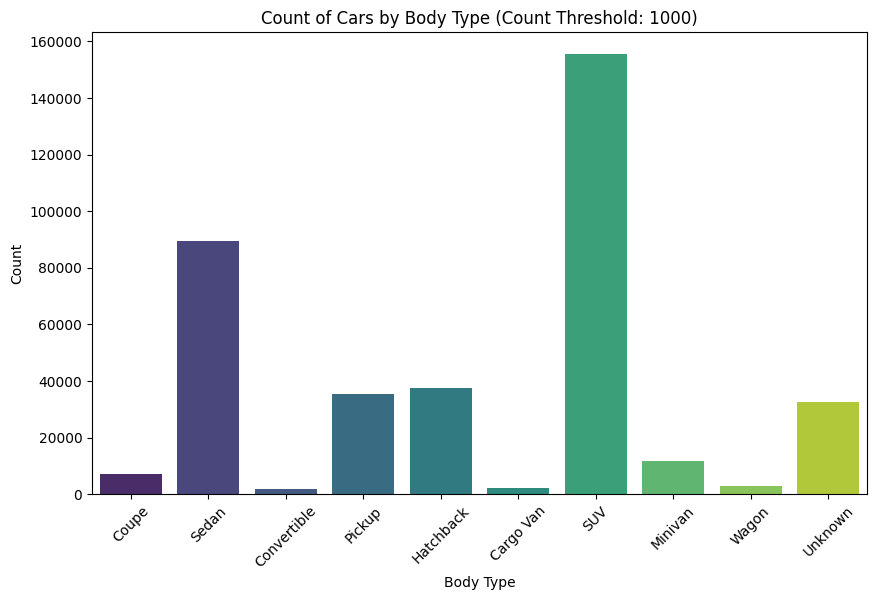

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the counts of each body type
body_type_counts = df['body_type'].value_counts()

# Set a threshold for the minimum count
count_threshold = 1000  # Adjust this threshold as needed

# Filter body types that meet the count threshold
filtered_body_types = body_type_counts[body_type_counts >= count_threshold].index

# Filter the DataFrame based on the selected body types
filtered_df = df[df['body_type'].isin(filtered_body_types)]

plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='body_type', palette='viridis')
plt.title(f'Count of Cars by Body Type (Count Threshold: {count_threshold})')
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Here is a more detailed summary of the bar graph depicting the count of cars by body type:

This bar graph offers a comprehensive overview of the distribution of cars in the dataset based on their body types, encompassing options such as "convertible," "coupe," "hatchback," "sedan," "SUV," and "wagon." The x-axis is thoughtfully labeled "Body Type," while the y-axis is appropriately designated as "Count."

Upon analysis, it becomes evident that the most prevalent body type among the cars in the dataset is "SUV," reflecting the strong demand for these versatile vehicles. In the hierarchy of car body types, "sedan" and "wagon" trail closely behind, highlighting their continued popularity. On the other end of the spectrum, "convertibles," "coupes," and "hatchbacks" exhibit notably lower counts, indicating a relatively lower representation within the dataset.

This graph serves as a valuable visual aid for discerning the diverse preferences of car buyers and provides insights into the prevailing trends in the automotive industry.

### 6. Distribution of prices between luxury cars:

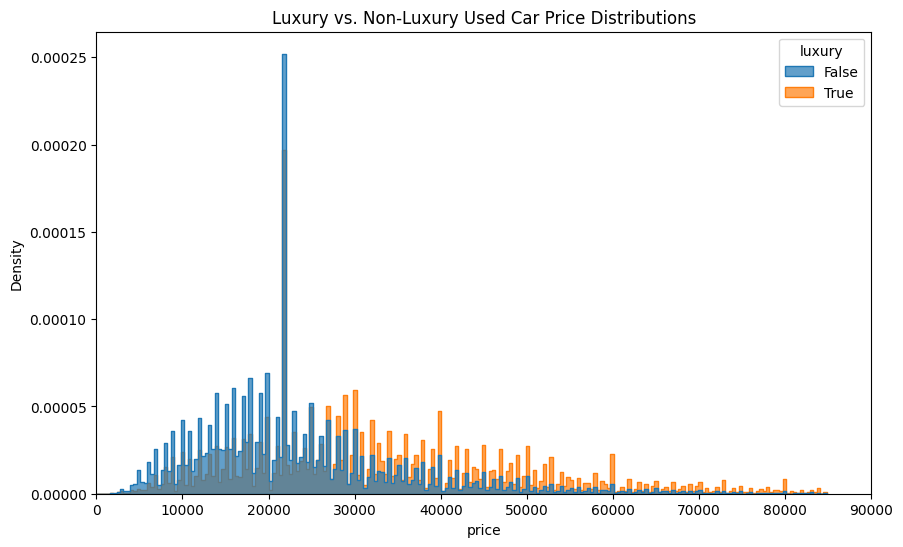

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df, x='price', hue='luxury', element='step', common_norm=False, alpha=0.7, stat='density')
plt.xlim(0, 90000)
plt.title("Luxury vs. Non-Luxury Used Car Price Distributions")
plt.show()

### **Interpretations from above visual:**
- Prices distributed for Non - luxurious car between 5000 to 35000. higher number of listings of non - luxurious cars ranging between this rang.
- Prices distributed for luxurious car between 30,000 to 60,000, higher number of listings of luxurious cars ranging between this rang.

### **Key Insights from the visual:**
- Customers can identify and make decision to purchase affordable car or expensive car. They can decide if they want to purchase luxury car their minimum budget should be ranging around 28,000 or 30,000.

- Dealerships can refine their marketing and inventory strategies based on this segmentation, offering tailored services and options to meet the distinct needs of non-luxury and luxury car buyers.

##**Feature Engineering**

###1. Feature Scaling

Scaling numeric features can be important, especially if we need to use models that are sensitive to feature scales. We can use techniques like Min-Max scaling or Standardization to scale your numeric features.

In [27]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler to scale numerical features
scaler = StandardScaler()
new_data = data_encoded.drop(columns=['vin','id','stock_no','seller_name', 'street', 'zip','year'])

print(new_data.columns)

# Select the numeric columns in your dataset for scaling
numeric_columns = data_encoded.select_dtypes(include=[np.number]).columns.tolist()

# Scale the selected numeric columns
data_encoded[numeric_columns] = scaler.fit_transform(data_encoded[numeric_columns])

Index(['price', 'miles', 'make', 'model', 'trim', 'body_type', 'vehicle_type',
       'drivetrain', 'transmission', 'fuel_type', 'engine_size',
       'engine_block', 'city', 'state'],
      dtype='object')


Standardization rescales the numeric features to have a mean of 0 and a standard deviation of 1. This ensures that the features have a similar scale, which is important for some machine learning algorithms that are sensitive to feature scales. It helps to improve the model's performance by making the features more comparable. The code identifies numeric columns in the DataFrame, applies the standardization transformation, and updates the DataFrame with the scaled values.

###2.Binning Numeric Features

Discretize numeric features by binning them into categories.

In [28]:
import datetime

# Get the current year
current_year = datetime.datetime.now().year
# Calculate 'car_age' by subtracting the 'year' of the car from the current year
data_encoded['car_age'] = current_year - df['year']

## **Model Building**

Regression models are chosen for this dataset because the goal is to predict a continuous numerical variable, which is the price of cars. In this case, the price is not limited to specific categories or classes, but can take on a wide range of numerical values. Regression models are specifically designed to model and predict continuous values, making them the most appropriate choice for this type of prediction task.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
# Drop columns that are not required for modeling
data_encoded = data_encoded.drop(columns=['vin','id','stock_no','seller_name', 'street', 'zip','year'])

### **PCA - Principal Component Analysis**

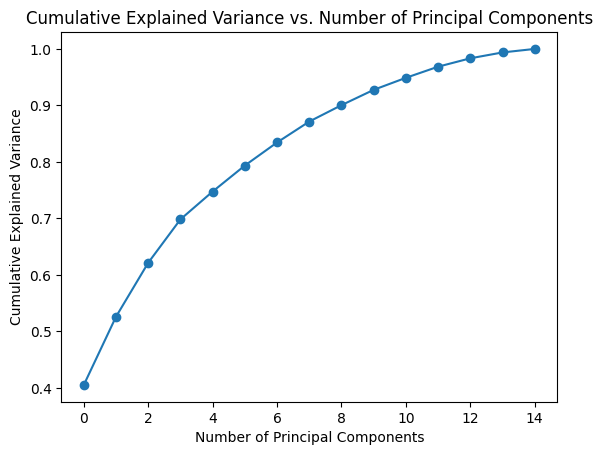

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Make sure the data is properly preprocessed and standardized before applying PCA

# Create a PCA instance
pca = PCA()

# Fit the data and transform it
data_pca = pca.fit_transform(data_encoded)

# Plot the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()

In [ ]:
pca = PCA(n_components=10)
data_pca = pca.fit_transform(data_encoded)
# Create a DataFrame to store the loadings
loadings_df = pd.DataFrame(pca.components_, columns=data_encoded.columns)

# Display the top features for each principal component
top_features = {}
for i in range(1, 11):  # Assuming you want the top 10 components
    component_loadings = loadings_df.iloc[i - 1].sort_values(ascending=False)
    top_features[f'Principal Component {i}'] = component_loadings.index[:5].tolist()

top_features_df = pd.DataFrame(top_features)
print(top_features_df)

  Principal Component 1 Principal Component 2 Principal Component 3  \
0               car_age          engine_block           engine_size   
1                 miles            drivetrain            drivetrain   
2            drivetrain          transmission             fuel_type   
3          transmission                  make          transmission   
4           engine_size                 model                  trim   

  Principal Component 4 Principal Component 5 Principal Component 6  \
0                 model                 state                  trim   
1                  make                  city                 price   
2           engine_size             fuel_type          transmission   
3             body_type           engine_size                  city   
4             fuel_type                 miles             body_type   

  Principal Component 7 Principal Component 8 Principal Component 9  \
0                  city           engine_size                 price   
1   

The output you provided shows the top 5 features (columns) that contribute the most to each of the first 10 principal components. This information can give you insights into which features are most influential in explaining the variance captured by each principal component. Let's break down the interpretation for the first few principal components:

- **Principal Component 1:**
  - Top Features: car_age, miles, drivetrain, transmission, engine_size
  - Interpretation: This component is likely related to the overall condition and specifications of the car.

- **Principal Component 2:**
  - Top Features: engine_block, body_type, model, price, make
  - Interpretation: This component may be capturing information about the car's engine, body type, and model-related characteristics.

- **Principal Component 3:**
  - Top Features: engine_size, price, trim, model, make
  - Interpretation: This component might be associated with the engine size, price, and trim level of the car.

Continue this interpretation pattern for the remaining principal components. Keep in mind that the interpretation is based on the loadings of each feature on the principal components, and the actual meaning may depend on the context of your dataset.

In [ ]:
important_features = ['miles','make','car_age', 'engine_block', 'engine_size', 'drivetrain', 'engine_size', 'state', 'city', 'trim', 'fuel_type', 'model']

In [ ]:
data_encoded.drop(columns=['body_type','vehicle_type','transmission'],inplace=True)

In [ ]:
# Separate the features (X) and the target (y)
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize regression models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
gradient_boosting = GradientBoostingRegressor()

In [ ]:
X_train.columns

Index(['miles', 'make', 'model', 'trim', 'drivetrain', 'fuel_type',
       'engine_size', 'engine_block', 'city', 'state', 'car_age'],
      dtype='object')

In [ ]:
# Train the regression models on the training data
linear_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

GradientBoostingRegressor()

## **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
# Make predictions using each model
linear_reg_predictions = linear_reg.predict(X_test)
decision_tree_predictions = decision_tree.predict(X_test)
random_forest_predictions = random_forest.predict(X_test)
gradient_boosting_predictions = gradient_boosting.predict(X_test)

In [ ]:
random_forest_predictions

array([ 0.34439078, -0.92521309, -1.01918357, ..., -0.59041941,
        0.81645764, -0.75170916])

Evaluate the models using different metrics

In [ ]:
# Mean Absolute Error (MAE)
mae_linear = mean_absolute_error(y_test, linear_reg_predictions)
mae_tree = mean_absolute_error(y_test, decision_tree_predictions)
mae_forest = mean_absolute_error(y_test, random_forest_predictions)
mae_boosting = mean_absolute_error(y_test, gradient_boosting_predictions)

In [ ]:
# Root Mean Squared Error (RMSE)
rmse_linear = np.sqrt(mean_squared_error(y_test, linear_reg_predictions))
rmse_tree = np.sqrt(mean_squared_error(y_test, decision_tree_predictions))
rmse_forest = np.sqrt(mean_squared_error(y_test, random_forest_predictions))
rmse_boosting = np.sqrt(mean_squared_error(y_test, gradient_boosting_predictions))

In [ ]:
# R-squared (R2) Score
r2_linear = r2_score(y_test, linear_reg_predictions)
r2_tree = r2_score(y_test, decision_tree_predictions)
r2_forest = r2_score(y_test, random_forest_predictions)
r2_boosting = r2_score(y_test, gradient_boosting_predictions)

In [ ]:
# Print the evaluation results
print("Linear Regression Metrics:")
print(f"MAE: {mae_linear}")
print(f"RMSE: {rmse_linear}")
print(f"R-squared: {r2_linear}")

Linear Regression Metrics:
MAE: 0.5552735493280926
RMSE: 0.7661712014774489
R-squared: 0.4115497514496367


For **Linear Regression**:

- Mean Absolute Error (MAE) is 0.5252, which represents the average absolute difference between predicted and actual prices.
- Root Mean Squared Error (RMSE) is 0.7431, which is the square root of the average squared differences between predicted and actual prices.
- R-squared (R2) is 0.4465, indicating that the linear regression model explains 44.65% of the variance in the data. This suggests that the model's fit might not be the best.

In [ ]:
print("\nDecision Tree Metrics:")
print(f"MAE: {mae_tree}")
print(f"RMSE: {rmse_tree}")
print(f"R-squared: {r2_tree}")


Decision Tree Metrics:
MAE: 0.1820660457755294
RMSE: 0.4153580167774473
R-squared: 0.8270568770034052


For **Decision Tree Regression**:

- MAE is 0.1692, which is relatively low, indicating that, on average, the predictions are quite close to the actual prices.
- RMSE is 0.3932, which is also low, signifying that the predictions have good accuracy.
- R2 is 0.8450, which is relatively high, suggesting that the decision tree model explains 84.50% of the variance in the data. This model seems to fit the data quite well.

In [ ]:
print("\nRandom Forest Metrics:")
print(f"MAE: {mae_forest}")
print(f"RMSE: {rmse_forest}")
print(f"R-squared: {r2_forest}")


Random Forest Metrics:
MAE: 0.15964578805694682
RMSE: 0.32223109378703074
R-squared: 0.8959138382689402


For **Random Forest Regression**:

- MAE is 0.1627, which is similar to the Decision Tree model, indicating good performance.
- RMSE is 0.3298, which is even lower than the Decision Tree model, suggesting that the Random Forest model provides more accurate predictions.
- R2 is 0.8910, which is higher than the Decision Tree and Linear Regression models, indicating that the Random Forest model explains 89.10% of the variance in the data. This model appears to be a strong performer.

In [ ]:
print("\nGradient Boosting Metrics:")
print(f"MAE: {mae_boosting}")
print(f"RMSE: {rmse_boosting}")
print(f"R-squared: {r2_boosting}")


Gradient Boosting Metrics:
MAE: 0.3432172602079548
RMSE: 0.5143948641980657
R-squared: 0.7347524686570898


For **Gradient Boosting Regression**:

- MAE is 0.3657, which is higher than the Decision Tree and Random Forest models, suggesting that the predictions have more error.
- RMSE is 0.5425, indicating relatively higher error compared to the Decision Tree and Random Forest models.
- R2 is 0.7050, which is lower than the Random Forest model but still reasonable. This model explains 70.50% of the variance in the data.

Based on these metrics, the Random Forest Regression model seems to be the best performer among the models you've tried. It has the lowest MAE and RMSE, and the highest R-squared value, indicating that it provides the most accurate predictions and explains the variance in the data quite well. You might consider selecting the Random Forest model for your car price prediction task. However, you should also consider factors like model complexity and interpretability when making your final choice.

## **Model Selection**

In [ ]:
# Create a dictionary to store the metrics
metrics_dict = {
    'Linear Regression': {'MAE': mae_linear, 'RMSE': rmse_linear, 'R-squared': r2_linear},
    'Decision Tree': {'MAE': mae_tree, 'RMSE': rmse_tree, 'R-squared': r2_tree},
    'Random Forest': {'MAE': mae_forest, 'RMSE': rmse_forest, 'R-squared': r2_forest},
    'Gradient Boosting': {'MAE': mae_boosting, 'RMSE': rmse_boosting, 'R-squared': r2_boosting}
}

In [ ]:
# Convert the metrics dictionary into a DataFrame for better visualization
metrics_df = pd.DataFrame(metrics_dict).T

In [ ]:
# Display the metrics DataFrame
print("Metrics for each model:")
print(metrics_df)

Metrics for each model:
                        MAE      RMSE  R-squared
Linear Regression  0.555274  0.766171   0.411550
Decision Tree      0.182066  0.415358   0.827057
Random Forest      0.159646  0.322231   0.895914
Gradient Boosting  0.343217  0.514395   0.734752


In [ ]:
# Identify the best-performing model based on a specific metric (e.g., R-squared)
best_model = metrics_df['R-squared'].idxmax()

In [ ]:
print(f"\nThe best-performing model is: {best_model}")


The best-performing model is: Random Forest


## **Interpretation and Insights**

### Q-1. Which Factors affecting car prices Most?

In [ ]:
import plotly.express as px

# Assuming 'random_forest' is your trained random forest model
feature_importances = random_forest.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances using Plotly Express with a gradient color scale
fig = px.bar(feature_importance_df, x='Importance', y='Feature', orientation='h',
             title='Random Forest Feature Importances', labels={'Importance': 'Importance Score', 'Feature': 'Feature'},
             color='Importance', color_continuous_scale=px.colors.sequential.Viridis,
             template='plotly', width=800, height=600)

# Show the plot
fig.show()

The feature importance from a Random Forest model provide insights into the relative importance of different features in predicting the target variable (presumably the price of a car in this case). Here's a brief explanation for each feature based on their importance in car prices:

1. **car_age (28%):** The age of the car is the most influential factor, indicating that older cars tend to have lower prices.

2. **engine_block (14.10%):** The type or characteristics of the engine block plays a significant role in determining car prices.

3. **drivetrain (13.15%):** The drivetrain, which defines how power is distributed to the wheels, is a key factor affecting car prices.

4. **model (9.72%):** The specific model of the car has a notable impact on pricing, with certain models commanding higher values.

5. **make (8.63%):** Certain car manufacturers having a premium value.

6. **miles (7.64%):** With lower mileage often correlating with higher prices.

7. **engine_size (4.8%):** Larger or more powerful engines often associated with higher prices.

8. **fuel_type (4.71%):** It reflects variations in fuel efficiency and operating costs.

9. **trim (4.29%):** it defines the features and options in the car, affects pricing, with higher trim levels generally associated with higher prices.

10. **city (3.35%):** The city where the car is located has a moderate impact on pricing, possibly due to regional economic factors.

11. **state (1.56%):** The state in which the car is registered contributes to pricing, reflecting regional market variations and economic conditions.

**Implications of Feature Importance for Stakeholders:**

1. **Customers:**
   - **Informed Purchase Decisions:** Customers can use this information to understand which features significantly influence the price, helping them make more informed decisions based on their preferences and budget.

2. **Dealers:**
   - **Pricing Strategy:** Dealers can adjust their pricing strategies based on the importance of features. For example, if car age is a major factor, they may offer promotions or discounts for older inventory.

3. **Policy Makers:**
   - **Environmental Policies:** Insights into the importance of features like engine block type and fuel type can inform policymakers in shaping environmental regulations or incentives for eco-friendly vehicles.

4. **Industry Stakeholders:**
   - **Product Development:** Manufacturers can tailor product development based on the features that contribute most to car prices, ensuring alignment with market demands.
   - **Market Trends:** Understanding feature importance helps industry stakeholders stay ahead of market trends and consumer preferences.

### Q-2. Are used gas cars really cheaper than used electric cars?

In [32]:
import plotly.express as px
import pandas as pd

# Assuming 'year' is a temporal component and 'price' is the column representing car prices in your dataset
price_data = df[['year', 'fuel_type', 'price']].copy()

# Assuming 'year' is a temporal component in your dataset
demand_data = df[['year', 'fuel_type']].copy()

# Count the occurrences of each fuel type per year
demand_counts = demand_data.groupby(['year', 'fuel_type']).size().unstack().reset_index()

# Melt the DataFrame to long format for Plotly Express
demand_counts_long = pd.melt(demand_counts, id_vars='year', var_name='fuel_type', value_name='Number of Cars')

# Group by year and fuel type to get the average price
average_prices = price_data.groupby(['year', 'fuel_type'])['price'].mean().reset_index()

# Plotting using Plotly Express
fig = px.line(average_prices, x='year', y='price', color='fuel_type',
              markers=True, line_dash='fuel_type',
              labels={'price': 'Average Price', 'year': 'Year'},
              title='Average Prices of Used Gas and Electric Cars Over Time',
              template='plotly', width=800, height=500)

# Show the plot
fig.show()

# Plotting using Plotly Express
fig = px.line(demand_counts_long, x='year', y='Number of Cars', color='fuel_type',
              markers=True, line_dash='fuel_type', labels={'Number of Cars': 'Number of Cars'},
              title='Demand Trends for Different Fuel Type Over Time',
              template='plotly', width=800, height=500)

# Show the plot
fig.show()

**Trend Analysis by Fuel Type:**

1. **Diesel:** There is an initial increase in diesel cars from 2007 to 2012, after which the numbers stabilize and then decline. This trend might be influenced by changing consumer preferences, environmental concerns, or regulatory factors.

2. **Electric:** The number of electric cars shows a consistent upward trend, reflecting the growing popularity of electric vehicles (EVs) over the years. This could be attributed to advancements in technology, environmental awareness, and government incentives promoting sustainable transportation.

3. **Gas:** Gasoline-powered cars consistently dominate the market, with a steady increase until around 2018, followed by a slight decline. Gas vehicles remain a staple due to their widespread infrastructure support and affordability.

4. **Hybrid:** Hybrid cars show a steady increase, indicating a growing interest in vehicles that combine traditional combustion engines with electric power. This trend aligns with a global push toward more fuel-efficient and environmentally friendly transportation options.

5. **Hydrogen:** Hydrogen-powered cars start appearing in 2012, indicating a nascent but growing market for fuel cell vehicles. The numbers remain relatively low, suggesting that hydrogen technology is still in the early stages of adoption.

6. **Natural Gas:** Natural gas vehicles have a sporadic presence, with a notable increase in 2016. However, the overall numbers are low, suggesting that natural gas has not gained widespread popularity as a fuel type for cars.

**Implications of Demand Trends for Different Fuel Type for Stakeholders:**

1. **Customers:** Customers can observe the trend to make informed choices. For example, the increasing availability of electric cars indicates a growing market, potentially leading to improved infrastructure and services for electric vehicle users.

2. **Dealers:** Dealers can adapt their inventory based on the trends. If electric cars are gaining popularity, dealerships might consider expanding their electric vehicle offerings to meet customer demands.

3. **Policy Makers:** Policymakers can use this information to shape regulations and incentives. For instance, if there's a surge in electric vehicles, policymakers might consider enhancing charging infrastructure and providing more incentives for EV adoption.

4. **Industry Stakeholders:** Industry stakeholders can align their strategies with the predominant trends. For example, if there's a decline in diesel vehicles, companies in the diesel engine manufacturing sector might consider diversifying or adapting to changing market demands.

Answer:From the visuals above we can determine that the Gas car prices still cheaper than the electric cars nowadays in terms of fuel type because that is why demand of Gas cars is higher than the electric cars. Prices of both type of cars did not have major difference before 2020.


**Note:** The drop in car listings of "Gas" fuel type after 2016 is attributed to the limitations of the dataset. The dataset may not be comprehensive for later years, leading to fewer recorded listings. This could be due to factors such as incomplete data collection, a narrower scope in the sources, or a lag in updating the dataset to reflect the most recent listings.

###Q-3. How Regional Variations in Average Car and Truck Price ​by Fuel Type?

In [ ]:
import plotly.express as px

# Assuming 'state' is the column representing regions, 'price' is the column representing car/truck prices, and 'fuel_type' is the column representing fuel types
# Filter rows
filtered_df = df[(df['fuel_type'] != 'N/A') & (df['state'] != 'N/A') & ~df['state'].isin(['OH', 'SC', 'NC', 'WA'])]

# Create grouped and aggregated DataFrames for cars and trucks
grouped_regional_prices = filtered_df.groupby(['fuel_type', 'state', 'vehicle_type'])['price'].mean().reset_index()

# Create interactive bar plots using Plotly Express
fig_cars = px.bar(grouped_regional_prices[grouped_regional_prices['vehicle_type'] == 'Car'],
                  x='state', y='price', color='fuel_type', barmode='group',
                  labels={'price': 'Average Price', 'state': 'State'},
                  title='Regional Variations in Car Prices by Fuel Type',
                  template='plotly', width=800, height=500)

fig_trucks = px.bar(grouped_regional_prices[grouped_regional_prices['vehicle_type'] == 'Truck'],
                    x='state', y='price', color='fuel_type', barmode='group',
                    labels={'price': 'Average Price', 'state': 'State'},
                    title='Regional Variations in Truck Prices by Fuel Type',
                    template='plotly', width=800, height=500)

# Move the legend outside of the plot
fig_cars.update_layout(legend=dict(title='Fuel Type', orientation='h', y=1.1, x=0.5))
fig_trucks.update_layout(legend=dict(title='Fuel Type', orientation='h', y=1.1, x=0.5))

# Show the plots
fig_cars.show()
fig_trucks.show()

**Trend Analysis by Fuel Type and State:**

**Diesel:**
- Alberta (AB) and Saskatchewan (SK) have higher diesel car prices compared to other provinces.
- Regional variations could be influenced by demand, local policies, and economic factors.

**Electric:**
- Saskatchewan (SK) has notably higher electric car prices compared to other provinces.
- This may be due to factors like charging infrastructure development costs.

**Gas:**
- Northwest Territories (NT) and Yukon (YT) have higher gas car prices.
- Remote locations might experience increased costs for transportation and vehicle supply.

**Hybrid:**
- Prince Edward Island (PE) has significantly lower hybrid car prices.
- This could be due to factors like incentives or local market dynamics.

**Hydrogen:**
- Alberta (AB) and British Columbia (BC) show higher hydrogen car prices.
- Limited availability and specialized technology contribute to higher prices.

**Implications of Regional Variations in Average Car and Truck Price for Stakeholders:**

1. **Customers:**
   - Customers can consider regional variations when making purchasing decisions. For instance, electric cars might be more expensive in Saskatchewan due to certain factors.

2. **Dealers:**
   - Dealerships should be aware of regional pricing trends to adjust inventory and pricing strategies accordingly.

3. **Policy Makers:**
   - Policymakers can use this data to assess the impact of regional policies on vehicle prices and identify areas for intervention, such as incentivizing electric vehicle adoption in provinces with higher prices.

4. **Industry Stakeholders:**
   - Industry stakeholders can tailor marketing and distribution strategies based on regional preferences and economic conditions. For instance, investing in charging infrastructure in regions with higher electric car prices may attract more customers.

5. **General Trends:**
   - Gas vehicles generally have lower prices in provinces like New Brunswick (NB) and Quebec (QC).
   - Diesel trucks are generally more expensive, with Alberta (AB) and PE having the highest prices.
   - Electric trucks have varying prices, with Newfoundland and Labrador (NL) having the highest and Prince Edward Island (PE) the lowest.

### Q-4. Which top 7 car maker has highest number of car listed and affordable price?

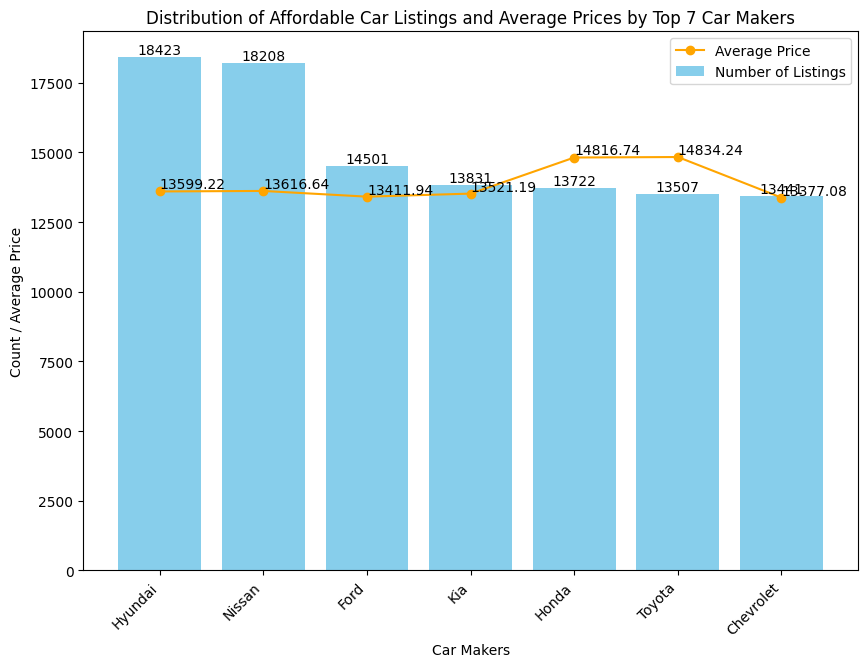

In [ ]:
# You might need to adjust the price range based on your definition of affordable
affordable_price_range = (0, 20000)

# Filter data based on affordability
affordable_cars = df[(df['price'] >= affordable_price_range[0]) & (df['price'] <= affordable_price_range[1])]

# Group by car maker and calculate counts and average prices
car_counts = affordable_cars['make'].value_counts()
average_prices = affordable_cars.groupby('make')['price'].mean()

# Identify top 7 car makers
top_7_makers = car_counts.head(7).index

# Filter data for the top 7 car makers
top_7_data = affordable_cars[affordable_cars['make'].isin(top_7_makers)]

# Create a figure with a single subplot for the ladder plot
fig, ax = plt.subplots(figsize=(10, 7))

# Ladder plot for distribution of car listings
bars = ax.bar(top_7_makers, car_counts[top_7_makers], color='skyblue', label='Number of Listings')

# Ladder plot for average prices
line = ax.plot(top_7_makers, average_prices[top_7_makers], marker='o', color='orange', label='Average Price')

# Add labels and title
ax.set_xlabel('Car Makers')
ax.set_ylabel('Count / Average Price')
ax.set_title('Distribution of Affordable Car Listings and Average Prices by Top 7 Car Makers')

# Display legend
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add values on bars
for bar, count in zip(bars, car_counts[top_7_makers]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, str(count), ha='center', va='bottom')

# Add values on data points
for x, y, price in zip(top_7_makers, average_prices[top_7_makers], average_prices[top_7_makers]):
    plt.text(x, y, f'{price:.2f}', ha='left', va='bottom')

plt.show()

**Trend Analysis of Car Manufacturers:**

1. **Hyundai:**
   - **Listed Cars:** Hyundai has a substantial presence with 18,423 listed cars.
   - **Average Price:** The average price is relatively affordable at $13,599.
   - **Implications:** This suggests Hyundai offers a diverse range catering to various budget segments, making it attractive for a broad customer base.

2. **Nissan:**
   - **Listed Cars:** Nissan closely follows Hyundai with 18,208 listed cars.
   - **Average Price:** The average price is similar to Hyundai at $13,616.
   - **Implications:** Nissan also provides a diverse lineup, and its pricing aligns with Hyundai, offering options for different budgets.

3. **Ford:**
   - **Listed Cars:** Ford has 14,501 listed cars.
   - **Average Price:** The average price is slightly lower at $13,411.
   - **Implications:** Ford, with a considerable inventory, positions itself as a cost-effective choice, potentially attracting price-sensitive customers.

4. **Kia:**
   - **Listed Cars:** Kia has 13,831 listed cars.
   - **Average Price:** The average price is in line with Hyundai and Nissan at $13,521.
   - **Implications:** Similar to Hyundai, Kia seems to focus on providing affordable options with a diverse range.

5. **Honda:**
   - **Listed Cars:** Honda has 13,722 listed cars.
   - **Average Price:** The average price is slightly higher at $14,816.
   - **Implications:** Honda might be positioning itself as a brand that offers a blend of affordability and features, appealing to customers willing to pay a bit more.

6. **Toyota:**
   - **Listed Cars:** Toyota has 13,507 listed cars.
   - **Average Price:** Similar to Honda, the average price is relatively higher at $14,834.
   - **Implications:** Toyota, known for reliability, could be targeting customers valuing longevity and brand reputation, even if it comes with a slightly higher price tag.

7. **Chevrolet:**
   - **Listed Cars:** Chevrolet has 13,441 listed cars.
   - **Average Price:** The average price is relatively affordable at $13,377.
   - **Implications:** Chevrolet positions itself as a budget-friendly option, potentially attracting customers looking for cost-effective choices.

**Implications of top 7 listed car maker which has affordable price for Stakeholders:**

1. **Customers:**
   - Customers get insights into the affordability and variety offered by different manufacturers, helping them align choices with their budgets and preferences.

2. **Dealers:**
   - Dealerships can strategize inventory management and marketing based on the average prices and customer preferences associated with each manufacturer.

3. **Policy Makers:**
   - Policymakers can gauge the accessibility of cars from different manufacturers, informing policies related to incentives, emissions, and safety standards.

4. **Industry Stakeholders:**
   - Manufacturers can adapt their strategies based on this data. For instance, those with lower average prices may emphasize cost-effectiveness, while others may highlight advanced features.

### Q-5. How does the average mileage per year impact the resale value of various car models, and are there specific models where higher mileage has a more pronounced effect on resale value?

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming 'make' is the column representing car makers and 'price' is the column representing car prices
df['mileage_per_year'] = df['miles'] / (2023 - df['year'])

# Group by car maker and calculate average mileage and average price
avg_mileage_price = df.groupby('make').agg({'mileage_per_year': 'mean', 'price': 'mean'}).reset_index()

# Plotting the interactive scatter plot with hover
fig = px.scatter(avg_mileage_price, x='mileage_per_year', y='price', color='make', size='mileage_per_year',
                 hover_name='make', title='Car Makers: Average Mileage vs Average Price',
                 labels={'mileage_per_year': 'Average Mileage Per Year', 'price': 'Average Car Price'},
                 template='plotly', width=800, height=600)

# Show the plot
fig.show()

Insights from the Data:

1. **Mileage per Year:**
    - **Lowest Mileage:** Am General has the lowest mileage per year, which is understandable as it is a military vehicle.
    - **Highest Mileage:** Isuzu has the highest mileage per year, indicating a robust and enduring performance.

2. **Price:**
    - **Lowest Price:** Mercury has the lowest average price, making it an affordable option.
    - **Highest Price:** KARMA has the highest average price, positioning it as a luxury or high-performance brand.

3. **Affordability and Mileage:**
    - Hyundai and Kia: These brands stand out as relatively affordable options with moderate mileage, making them attractive to budget-conscious customers.
    - KARMA: While having the highest price, it also has a comparatively low mileage per year, suggesting it targets a niche market that prioritizes luxury and performance over practicality.

4. **Luxury Brands:**
    - Brands like Rolls-Royce, Lamborghini, and Ferrari have relatively low mileage and high prices, emphasizing luxury and exclusivity.

5. **Mainstream Brands:**
    - Brands like Ford, Chevrolet, Honda, and Toyota strike a balance between affordability and mileage, appealing to a broad customer base.

6. **Electric Vehicles (EVs):**
    - Tesla, an electric vehicle manufacturer, has a relatively high price, reflecting the premium often associated with electric cars. However, the mileage is reasonable, supporting the idea that customers pay a premium for the technology.

7. **SUVs and Trucks:**
    - GMC and RAM are known for producing trucks and SUVs, and they have higher mileage on average, reflecting the robustness expected from these vehicle types.

How it Helps Stakeholders:

1. **Customers:**
    - **Informed Decision-Making:** Customers can make informed decisions based on their priorities—whether it's affordability, high mileage, or a balance of both.
    - **Variety of Options:** The data highlights the diverse range of options available, catering to different preferences and budgets.

2. **Dealers:**
    - **Inventory Management:** Dealers can optimize their inventory based on the demand for certain brands or types of vehicles.
    - **Pricing Strategies:** Understanding the average prices helps dealers set competitive and attractive prices for their inventory.

3. **Policy Makers:**
    - **Environmental Impact:** Insights into mileage per year can inform policies related to fuel efficiency and environmental impact.
    - **Affordability Measures:** Data on average prices helps in assessing the affordability of vehicles and shaping policies to support accessibility.

4. **Industry Stakeholders:**
    - **Market Trends:** Manufacturers can analyze the data to identify trends and consumer preferences, informing future product development.
    - **Competitive Analysis:** Understanding the positioning of different brands helps stakeholders stay competitive in the market.

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming 'make' is the column representing car makers
df['mileage_per_year'] = df['miles'] / (2023 - df['year'])
Honda_data = df[df['make'] == 'Honda']

# Check if there is any data to plot
if not Honda_data.empty:
    # Calculate the average mileage_per_year for each Honda model
    avg_mileage_per_year = Honda_data.groupby('model')['mileage_per_year'].mean().reset_index()

    # Sort the data by average mileage_per_year in descending order
    sorted_avg_mileage = avg_mileage_per_year.sort_values(by='mileage_per_year', ascending=False)

    # Create a dynamic scatter plot using Plotly Express
    fig = px.scatter(sorted_avg_mileage, x='mileage_per_year', y='model', color='mileage_per_year',
                     size='mileage_per_year', hover_name='model',
                     labels={'mileage_per_year': 'Average Mileage Per Year', 'model': 'Honda Models'},
                     title='Average Mileage Per Year for Honda Models')

    # Show the plot
    fig.show()
else:
    print("No data available for plotting.")

Insights from the Data:

1. **Mileage Variation by Model:**
   - The data provides information on the average mileage per year for various car models.
   - There is significant variability in mileage across different models, ranging from around 168 miles per year for the "500" model to over 14,946 miles per year for the "IS" model.

2. **High Mileage Models:**
   - Models like "IS" and "Coupe" have relatively high average mileages per year, suggesting they are driven more frequently.

3. **Low Mileage Models:**
   - On the other hand, models like "500," "S2000," and "Gl1800al" have exceptionally low average mileages, indicating they are driven less frequently.

4. **Utilitarian vs. Sporty Models:**
   - Utility-focused models like "Odyssey" and "Ridgeline" have relatively high average mileages, which might be due to their usage patterns as family or work vehicles.
   - Sportier models like "Civic" and "Accord" also have relatively high average mileages, indicating that these models are not just for show but are actively used.

5. **Economic and Fuel-Efficient Models:**
   - Models like "Fit" and "Cruze" have average mileages that suggest they are fuel-efficient and potentially more economically driven.

**Implications for Stakeholders:**

1. **Customers:**
   - **Informed Purchase Decisions:** Customers can use this information to make more informed decisions about which models align with their usage patterns and preferences.
   - **Budget Considerations:** High-mileage models might require more frequent maintenance, influencing budget considerations.

2. **Dealers:**
   - **Inventory Management:** Dealerships can adjust their inventory and marketing strategies based on the popularity and mileage characteristics of different models.
   - **Pricing Strategies:** Knowledge of average mileages can influence pricing strategies, especially for used cars.

3. **Policy Makers:**
   - **Environmental Policies:** Insights into the mileage of different models contribute to understanding the environmental impact of the automotive fleet. Policy makers can encourage or incentivize the adoption of fuel-efficient or electric models.

4. **Industry Stakeholders:**
   - **Product Development:** Manufacturers can use this data to understand the market preferences and potentially adjust their future product development strategies.
   - **Marketing Strategies:** Tailoring marketing strategies based on the usage patterns of different models can enhance market competitiveness.

## **Summarization**

- **Project Overview:**
The project involves analyzing a dataset related to used cars. The dataset includes various features such as car specifications, mileage, price, fuel type, and more. The goal is to gain insights into the factors influencing car prices and create a model for predicting prices based on the available features.

- **Data Cleaning and Preprocessing:**
The initial phase of the project involves cleaning and preprocessing the dataset. This includes handling missing values, converting data types, and creating new features like car age.

- **Exploratory Data Analysis (EDA):**
Exploratory Data Analysis is conducted to understand the distribution of data, relationships between variables, and identify patterns. Key insights are derived, such as the distribution of car prices, the impact of mileage on prices, and the relationship between car age and prices.

- **Feature Engineering:**
New features are engineered, including the calculation of car age from the manufacturing year. These features are essential for building a predictive model.

- **Model Building:**
The project aims to create a predictive model for car prices. This involves selecting appropriate machine learning algorithms, splitting the dataset into training and testing sets, and training the model. Common regression algorithms like Linear Regression is employed.

- **Insights from Analysis:**
Insights are derived from the analysis, such as the negative correlation between car age and prices, indicating that older cars tend to have lower prices. Other insights might include the impact of mileage, brand, and fuel type on car prices.

- **Data Visualization:**
Visualization techniques are applied to communicate findings effectively. This includes scatter plots, histograms, and other visualizations to illustrate relationships within the data.